Install and Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Load the Dataset

In [2]:
df = pd.read_csv('heart_disease_uci.csv')


Display first few rows

In [3]:
print(df.head(5))

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


Inspect Data

In [4]:
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Missing Values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps    

Rename target column and clean

In [6]:
df.rename(columns={'num': 'target'}, inplace=True)
df['target'] = (df['target'] > 0).astype(int)

Drop 'id' column (not useful)

In [7]:
df.drop(columns=['id'], inplace=True)


Handle Missing Values

In [8]:
df.replace({'': np.nan, '?': np.nan}, inplace=True)

Convert numeric columns to float where necessary

In [9]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Fill missing numeric values with median

In [10]:
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-3154000584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Categorical columns: fill with mode

In [11]:
categorical_cols = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'sex', 'dataset']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3512451438.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3512451438.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inplace=True)


Encode Categorical Variables

In [12]:
categorical_cols.remove('sex')  # We'll handle 'sex' separately as binary
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


Encode 'sex': Male = 1, Female = 0

In [13]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

print("Shape after encoding:", df.shape)


Shape after encoding: (920, 22)


Define Features and Target

In [14]:
X = df.drop('target', axis=1)
y = df['target']


Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

 Scale the Features

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train Models

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve


Dictionary to store results

In [19]:
models = {}
results = []


Logistic Regression

In [20]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
models['Logistic Regression'] = lr
results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1': f1_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, y_prob_lr)
})

Decision Tree

In [21]:
dt = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_split=5)
dt.fit(X_train, y_train)  # No scaling needed
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]
models['Decision Tree'] = dt
results.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1': f1_score(y_test, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test, y_prob_dt)
})

Random Forest

In [22]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=5,
                           random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
models['Random Forest'] = rf
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_prob_rf)
})


Display Results

In [23]:
results_df = pd.DataFrame(results)
print("\n Model Performance Comparison:")
print(results_df.round(4))



 Model Performance Comparison:
                 Model  Accuracy  Precision  Recall      F1  ROC-AUC
0  Logistic Regression    0.8370     0.8273  0.8922  0.8585   0.9213
1        Decision Tree    0.7989     0.7876  0.8725  0.8279   0.8488
2        Random Forest    0.8533     0.8505  0.8922  0.8708   0.9219


Highlight best model

In [24]:
best_model = results_df.loc[results_df['F1'].idxmax()]['Model']
print(f"\n Best Model (by F1-score): {best_model}")


 Best Model (by F1-score): Random Forest


Confusion Matrix for Best Model

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


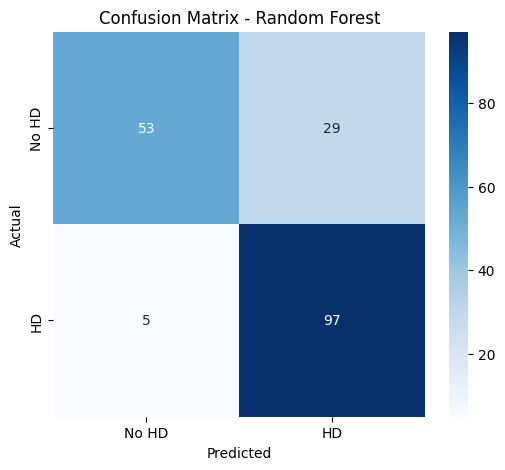

In [26]:
def plot_confusion_matrix(model_name):
    y_pred = models[model_name].predict(X_test if 'Tree' in model_name else X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No HD', 'HD'], yticklabels=['No HD', 'HD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(best_model)


ROC Curve for All Models

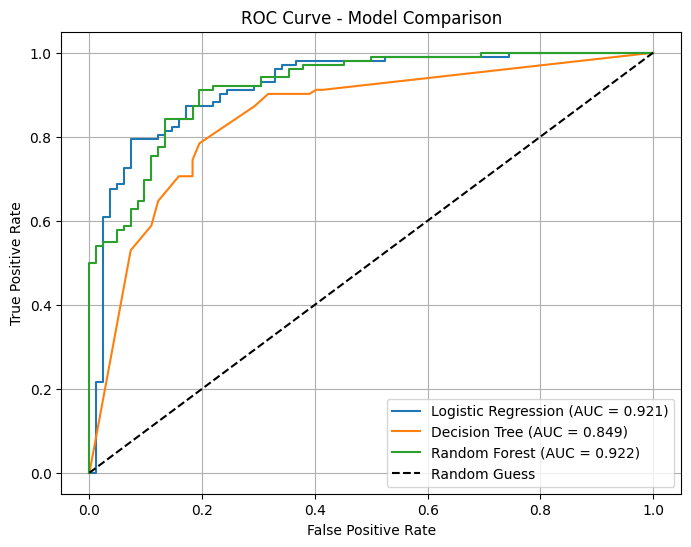

In [27]:
plt.figure(figsize=(8,6))
for model_name in models.keys():
    if model_name == 'Logistic Regression':
        y_prob = lr.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_prob):.3f})")
    elif model_name == 'Decision Tree':
        y_prob = dt.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_prob):.3f})")
    elif model_name == 'Random Forest':
        y_prob = rf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_prob):.3f})")

plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()


Feature Importance (Random Forest)

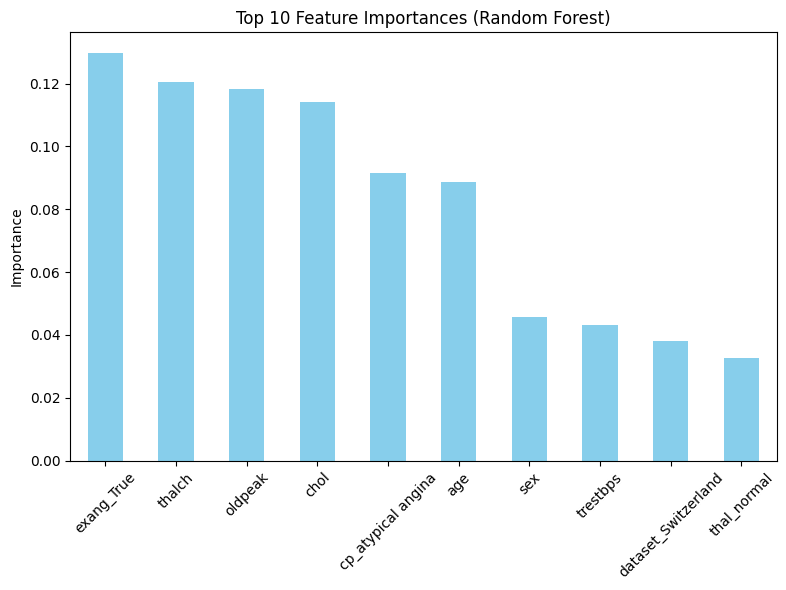

In [28]:
if best_model == 'Random Forest':
    feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    feat_importance.head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Feature Importances (Random Forest)')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

save model

In [30]:
import joblib

# Select best model
best_model_instance = models[best_model]

# Save model and scaler
joblib.dump(best_model_instance, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')  # Save feature names for inference

print("\n✅ Best model and preprocessing objects saved!")
print("Files: 'heart_disease_model.pkl', 'scaler.pkl', 'feature_columns.pkl'")


✅ Best model and preprocessing objects saved!
Files: 'heart_disease_model.pkl', 'scaler.pkl', 'feature_columns.pkl'
